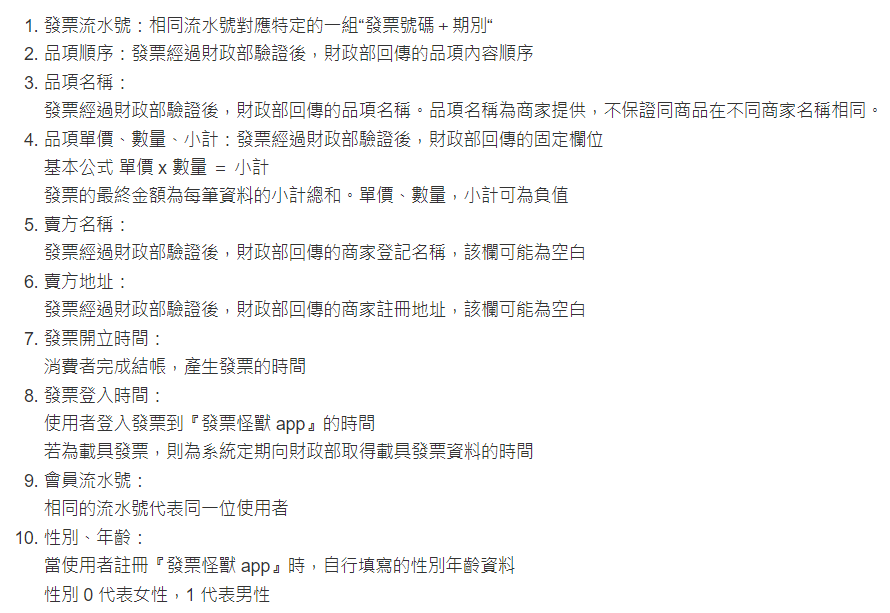

In [ ]:
#讀取檔案
import pandas as pd
#切割檔案
from sklearn.model_selection import train_test_split
#LogisticRegression
from sklearn.linear_model import LogisticRegression
#Roc
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report
#繪圖
import matplotlib.pyplot as plt 
#numpy
import numpy as np
#lightgbm
import lightgbm as lgb
#xgboost
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from xgboost.sklearn import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# 可以去掉 python 輸出時，因為軟體版本所引起的警告的警告。
import warnings
warnings.filterwarnings('ignore')

## 數據清理

In [ ]:
df = pd.read_csv(r'C:/Users/Melomi/Desktop/比賽/發票數據.csv')
columnames = ['發票流水號','順序','名稱','單價','數量','小計','賣方地址','發票開立時間','發票登錄時間','性別','年齡','會員流水號']
df.columns = columnames

去除不需要的欄位

In [ ]:
df1 = df.drop(['順序','發票登錄時間','發票流水號'],axis=1)
df1

,名稱,單價,數量,小計,賣方地址,發票開立時間,性別,年齡,會員流水號
0,租金,19950.0,1,19950.0,臺北市大安區敦化南路二段2號11樓,2020-01-01 01:57:24.000000,0,26,7441a277010a2c10700b5d39dbced305555874d5
1,押金息,168.0,1,168.0,臺北市大安區敦化南路二段2號11樓,2020-01-01 01:57:24.000000,0,26,7441a277010a2c10700b5d39dbced305555874d5
2,3點一刻減糖日月潭奶茶5入,50.0,1,50.0,NaN,2020-01-01 15:20:25.000000,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e
3,999999,0.0,131,0.0,NaN,2020-01-01 15:20:25.000000,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e
4,3點一刻減糖炭燒奶茶5入,50.0,1,50.0,NaN,2020-01-01 15:20:25.000000,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e
...,...,...,...,...,...,...,...,...,...
63132676,台灣烏龍茶,25.0,1,25.0,74169 臺南市善化區大成路348號1樓,2020-12-27 20:06:18.000000,0,30,460060366e5469ffbbce270f3fb114610510906d
63132677,台灣青茶,25.0,1,25.0,74169 臺南市善化區大成路348號1樓,2020-12-27 20:06:18.000000,0,30,460060366e5469ffbbce270f3fb114610510906d
63132678,台灣烏龍茶,25.0,1,25.0,72142 臺南市麻豆區民權路10-9號,2020-12-27 12:58:19.000000,0,30,460060366e5469ffbbce270f3fb114610510906d
63132679,台灣烏龍茶,25.0,1,25.0,74169 臺南市善化區大成路348號1樓,2020-12-27 09:53:10.000000,0,30,460060366e5469ffbbce270f3fb114610510906d


去除單價小於0的項目
(因不確定是否都是無意義的項目，之後可能要先以關鍵字過濾過後再去除)

In [ ]:
df1 = df1.drop(df1[df1['單價']<=0].index)
df1

,名稱,單價,數量,小計,賣方地址,發票開立時間,性別,年齡,會員流水號
0,租金,19950.0,1,19950.0,臺北市大安區敦化南路二段2號11樓,2020-01-01 01:57:24.000000,0,26,7441a277010a2c10700b5d39dbced305555874d5
1,押金息,168.0,1,168.0,臺北市大安區敦化南路二段2號11樓,2020-01-01 01:57:24.000000,0,26,7441a277010a2c10700b5d39dbced305555874d5
2,3點一刻減糖日月潭奶茶5入,50.0,1,50.0,NaN,2020-01-01 15:20:25.000000,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e
4,3點一刻減糖炭燒奶茶5入,50.0,1,50.0,NaN,2020-01-01 15:20:25.000000,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e
5,3點1刻 原味奶茶 5入盒,50.0,1,50.0,NaN,2020-01-01 15:20:25.000000,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e
...,...,...,...,...,...,...,...,...,...
63132676,台灣烏龍茶,25.0,1,25.0,74169 臺南市善化區大成路348號1樓,2020-12-27 20:06:18.000000,0,30,460060366e5469ffbbce270f3fb114610510906d
63132677,台灣青茶,25.0,1,25.0,74169 臺南市善化區大成路348號1樓,2020-12-27 20:06:18.000000,0,30,460060366e5469ffbbce270f3fb114610510906d
63132678,台灣烏龍茶,25.0,1,25.0,72142 臺南市麻豆區民權路10-9號,2020-12-27 12:58:19.000000,0,30,460060366e5469ffbbce270f3fb114610510906d
63132679,台灣烏龍茶,25.0,1,25.0,74169 臺南市善化區大成路348號1樓,2020-12-27 09:53:10.000000,0,30,460060366e5469ffbbce270f3fb114610510906d


會員數

In [ ]:
len(df1.會員流水號.unique())

In [ ]:
member = df1.groupby(['會員流水號']).agg({'性別':np.mean})
member

會員性別占比

In [ ]:
count_classes = pd.value_counts(member['性別'], sort=True).sort_index()
count_classes.plot(kind='bar',color='lightpink') 
print(count_classes)

In [ ]:
df1.to_csv('C:/Users/Melomi/Desktop/比賽/發票整理1.csv',encoding = 'utf-8-sig' ,index=False)

## 建立關鍵字清單

In [ ]:
df1 = pd.read_csv(r'C:/Users/melomi/Downloads/發票整理1.csv')

飲食&運動

參考資料:國民健康署 台灣肥胖防治策略、減醣食譜、社群網站關鍵字整理

In [ ]:
keywords = '無糖|無加糖|減糖|減醣|減脂|減鹽|少鹽|沙拉|低卡|零卡|0卡|零熱量|低醣|低糖|低油|全穀|五穀|藜麥|燕麥|糙米|雞胸|酪梨|櫛瓜|堅果|蒟蒻|低脂|脫脂|高纖\
|低鈉|低鹽|高蛋白|蛋白質|原型食物|健身|瘦身|減重|減肥|養生|生酮|斷食|防彈咖啡|全麥|花椰菜'
wrong = '沙拉油|沙拉脫|桂冠沙拉|肉鬆沙拉|龍蝦沙拉|鹽酥雞'         

In [ ]:
%%time

#最快

df_healthy = df1.loc[df1['名稱'].str.contains(keywords, na=False)]
df_healthy = df_healthy.loc[df1['名稱'].str.contains(wrong, na=False) == False]

df_healthy

CPU times: total: 46.9 s
Wall time: 47 s


,名稱,單價,數量,小計,賣方地址,發票開立時間,性別,年齡,會員流水號
2,3點一刻減糖日月潭奶茶5入,50.0,1,50.0,NaN,2020-01-01 15:20:25.000000,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e
4,3點一刻減糖炭燒奶茶5入,50.0,1,50.0,NaN,2020-01-01 15:20:25.000000,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e
29,全麥三明治-鮮蔬鮪魚,45.0,1,45.0,台中市西屯區青海路二段240-1號,2020-01-01 00:36:51.000000,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1
30,全麥三明治-迷迭香烤腿排,60.0,1,55.0,台中市西屯區青海路二段240-1號,2020-01-01 00:36:51.000000,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1
39,*統一陽光無加糖高纖豆漿450ml盒,20.0,1,20.0,桃園市桃園區龍安街79號81號,2020-01-01 00:41:49.000000,0,48,fab5342d57dd50dc4cf79287ad6345d74282f742
...,...,...,...,...,...,...,...,...,...
63132441,(A)統一陽光無加糖高纖豆漿450ml,20.0,1,20.0,新北市土城區中央路四段281之8號281之9號,2020-12-06 19:49:44.000000,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221
63132447,愛之味牛奶燕麥290ml,30.0,1,30.0,新北市土城區中央路四段281之8號281之9號,2020-12-23 20:07:33.000000,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221
63132448,(A)質立希臘式優格(無加糖),35.0,1,35.0,新北市土城區中央路四段281之8號281之9號,2020-12-23 20:07:33.000000,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221
63132449,(A)新感覺雞蛋沙拉,30.0,1,30.0,新北市土城區中央路四段281之8號281之9號,2020-12-23 20:07:33.000000,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221


In [ ]:
%%time

# 比iterrows快,但還是很慢
'''
df3 = pd.DataFrame(columns=['Index','名稱','單價','數量','小計','賣方地址','發票開立時間','性別','年齡','會員流水號'])
t = 0

for row in df2.itertuples():
    count = 0
    for keyword in keywords:
        if keyword in str(row.名稱):
            count += 1            
    if count >= 1:
        df3.loc[t] = row
        t += 1

df3 = df3.drop(['Index'],axis=1)
df3
'''

In [ ]:
def date(x):
    x = x[10:19]
    return x

df_healthy['發票開立時間'] = df_healthy['發票開立時間'].apply(date)
df_healthy

In [ ]:
# 將'臺'統一為'台'

def tai(x):
  x = str(x).replace('臺','台') 
  return x

df_healthy['賣方地址'] = df_healthy['賣方地址'].apply(tai)
df_healthy

,名稱,單價,數量,小計,賣方地址,發票開立時間,性別,年齡,會員流水號
2,3點一刻減糖日月潭奶茶5入,50.0,1,50.0,nan,15:20:25,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e
4,3點一刻減糖炭燒奶茶5入,50.0,1,50.0,nan,15:20:25,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e
29,全麥三明治-鮮蔬鮪魚,45.0,1,45.0,台中市西屯區青海路二段240-1號,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1
30,全麥三明治-迷迭香烤腿排,60.0,1,55.0,台中市西屯區青海路二段240-1號,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1
39,*統一陽光無加糖高纖豆漿450ml盒,20.0,1,20.0,桃園市桃園區龍安街79號81號,00:41:49,0,48,fab5342d57dd50dc4cf79287ad6345d74282f742
...,...,...,...,...,...,...,...,...,...
63132441,(A)統一陽光無加糖高纖豆漿450ml,20.0,1,20.0,新北市土城區中央路四段281之8號281之9號,19:49:44,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221
63132447,愛之味牛奶燕麥290ml,30.0,1,30.0,新北市土城區中央路四段281之8號281之9號,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221
63132448,(A)質立希臘式優格(無加糖),35.0,1,35.0,新北市土城區中央路四段281之8號281之9號,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221
63132449,(A)新感覺雞蛋沙拉,30.0,1,30.0,新北市土城區中央路四段281之8號281之9號,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221


處理地址

In [ ]:
# 新增縣市欄位

city = ['台北市','新北市','桃園市','台中市','台南市','高雄市','新竹縣','苗栗縣','彰化縣','南投縣','雲林縣','嘉義縣','屏東縣','宜蘭縣','花蓮縣','台東縣','澎湖縣','金門縣','連江縣','基隆市','新竹市','嘉義市']
city_col = []
def check_city(x):
    c = [c for c in city if c in x]
    try:
        city_col.append(c[0])
    except:
        city_col.append('None')

df_healthy['賣方地址'].apply(check_city)
df_healthy['縣市'] = city_col
df_healthy = df_healthy.drop(['賣方地址'],axis=1)
df_healthy

,名稱,單價,數量,小計,發票開立時間,性別,年齡,會員流水號,縣市
2,3點一刻減糖日月潭奶茶5入,50.0,1,50.0,15:20:25,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e,None
4,3點一刻減糖炭燒奶茶5入,50.0,1,50.0,15:20:25,0,29,d3d02a65388a9448d2273c27a3c5304d36bf2d8e,None
29,全麥三明治-鮮蔬鮪魚,45.0,1,45.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市
30,全麥三明治-迷迭香烤腿排,60.0,1,55.0,00:36:51,0,20,ddb4fa00b2c1530eb8c3cc0243863da29ab5cac1,台中市
39,*統一陽光無加糖高纖豆漿450ml盒,20.0,1,20.0,00:41:49,0,48,fab5342d57dd50dc4cf79287ad6345d74282f742,桃園市
...,...,...,...,...,...,...,...,...,...
63132441,(A)統一陽光無加糖高纖豆漿450ml,20.0,1,20.0,19:49:44,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市
63132447,愛之味牛奶燕麥290ml,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市
63132448,(A)質立希臘式優格(無加糖),35.0,1,35.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市
63132449,(A)新感覺雞蛋沙拉,30.0,1,30.0,20:07:33,0,30,a80e5e42aef19f6d288d7cd51e42b58c60119221,新北市


In [1]:
df_healthy.to_csv('C:/Users/Melomi/Desktop/比賽/發票整理(已過濾).csv',encoding = 'utf-8-sig' ,index=False)

NameError: ignored